# Scope of this tutorial

Welcome to the first America's Water Model tutorial!  In this tutorial, you are going to learn how to (0) install the model, (1) run the model in simulation and optimization mode with different configurations, (2) look at the results, and (3) make requests of and get updates from the modeling team.

# Some terminology

We are going to use a bunch of terms in this tutorial, so it's important to clear up the confusion.

* **The model**: A computer program that can provide information on how water is or could be supplied and consumed in the US.
* **Julia**: The programming language used for the model.  <img style="float: right; position: relative; top: -20px; width: 150px" src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/Julia_prog_language.svg/2000px-Julia_prog_language.svg.png">  From the [Julia website](http://julialang.org/):

    *Julia is a high-level, high-performance dynamic programming language for technical computing, with syntax that is familiar to users of other technical computing environments.*
    

* **Jupyter Notebook**: A program to make documents, like this one, that combine Julia programming and text.
* **Git**: A program that saves all previous versions of the model, and lets the modeling team collaborate.  All of these previous versions are stored on the website [Github](github.com/AmericasWater/operational-problem).
* **Terminal**: A text interface to your computer, needed to use Git and Jupyter Notebook.
* **Mimi**: The foundational code used by the model to provide its structure, developed by [David Anthoff](http://www.david-anthoff.com/).
* **Simulation**: A way to run the model, where inputs (or *parameters*) are used to determine the value of outputs (or *variables*).
* **Optimization**: Another way to run the model, where constraints on outputs (or *variables*) are used to determine inputs (or *parameters*).

# Setting up your environment

You will need some basic software to use the America's Water Model.

* **Julia (command line version)** from http://julialang.org/downloads/

    Check your installation by running Julia and writing some arithmetic.
    
    
* **Git** from https://git-scm.com/book/en/v2/Getting-Started-Installing-Git

    If you're on Windows, also download PowerShell (https://msdn.microsoft.com/en-us/powershell/)

    Check that it's installed by opening a terminal/PowerShell and typing `git --version` and see a version number.
    
    
* **Jupyter Notebook** from http://jupyter.readthedocs.io/en/latest/install.html

    Check that it's installed by opening a terminal/PowerShell and typing `jupyter notebook` and see a browser window pop up.


# Installing the model

Now it's time to download the model.  First, decide where you want to put the model, and open a terminal to this location.

## Aside: How to navigate to the model in the terminal

1. Opening a terminal.  Doing this is different by OS:
 - On Mac OS: Open the Terminal program.
 - On Windows: Open the PowerShell program.
 - On Linux: Open up a shell window.
2. To change directory, type `cd <directory>`.  `<directory>` can be any of the following:
 - The name of a subdirectory.
 - Two periods (`..`) to go to the parent directory.
 - A single period (`.`) to not go anywhere.
 - Any combination of the above, separated by slashes (`/`).
 - A tilde (`~`) to go back to your home directory.
 - A slash (`/`) to go to the root of the server.
 - Either of the previous two, combined with any of the first four, using slashes.
 - Use the tab key to auto-complete the name you have started to type.
 - If there are spaces in your directory or filename, consider the life choices that led to this moment.
3. The model will be created in a new folder, when you download it.  From then on, for anything from this tutorial, you will want to go into the `docs` subdirectory of that folder.

## Downloading the model

In the directory where you want the model folder, paste the following command:

```
git clone https://github.com/AmericasWater/awash.git```

# What you just got

The model is organized into different folders.  Here is what is in there:
* `configs/`: Configuration files, that determine the basic operation of the model.
* `data/`: Input data files.  There is also a `data/cache/` folder, with saved preparation files.  You can delete this to force the model to reinitialize.
* `docs/`: Documentation, including tutorials like this one.
* `prepare/`: Some source data files and the scripts needed to prepare them for use in the model.
* `results/`: The standard location for output results, along with code for post-processing.
* `src/`: The main source code for the model.  All the magic happens here.
* `test/`: Automatic testing scripts, to make sure changes don't break how the model should work.

# Opening the model

For the purposes of this tutorial, the main interface of the model is Jupyter Notebooks, and the existing tutorials in the `docs/` subdirectory.  To start the model, do the following:

1. Open a terminal to the `docs/` subdirectory of the model.
2. Type/paste the following command: `jupyter notebook`.
3. In the browser window that opens, find the item `start.ipynb` and click on it.
4. Click the "<span style="font-family: FontAwesome" class="fa-step-forward fe"></span>" button, which will run the line below.

If this is the first time you're running the model, it is going to install some needed libraries and data.

In [1]:
include("../src/nui.jl")

┌──────────────────────────────────────────────────┐
│    ▄▄    ▄▄      ▄▄    ▄▄       ▄▄▄▄    ▄▄    ▄▄ │
│   ████   ██      ██   ████    ▄█▀▀▀▀█   ██    ██ │
│   ████   ▀█▄ ██ ▄█▀   ████    ██▄       ██    ██ │
│  ██  ██   ██ ██ ██   ██  ██    ▀████▄   ████████ │
│  ██████   ███▀▀███   ██████        ▀██  ██    ██ │
│ ▄██  ██▄  ███  ███  ▄██  ██▄  █▄▄▄▄▄█▀  ██    ██ │
│ ▀▀    ▀▀  ▀▀▀  ▀▀▀  ▀▀    ▀▀   ▀▀▀▀▀    ▀▀    ▀▀ │
└──────────────────────────────────────────────────┘

Welcome to AWASH, the America's Water Model, version 0.7.



# Configuration parameters

The configuration file determines the general bounds of the model.  The current configuration parameters are:

* **`netset`**: The top-level decision of the world we are deciding.

    options: `usa` (full-country), `three` (3-counties), `dummy` (5-counties)
    
    
* **`filterstate`**: Only include counties within this state (give as 2 digit FIPS).

    e.g., "`10`" for Delaware (3 counties), "`08`" for Colorado (64 counties)
    
    
* **`startmonth`** and **`endmonth`**: First and last month of the simulation.

    e.g., 10/2000 - 9/2010
    
    
* **`startweather`**: The weather entry to match to `startmonth`.

    e.g., 1 to use the first month in `VIC_WB`for the first month in the simulation.
    
    
* **`timestep`**: The number of months for each timestep of the model.

    The larger this number, the faster the model will run.  Currently agriculture is calculated separately for each timestep.
    
# Standard configuration sets

There are three configuration sets to know about:

* `complete.yml`: A monthly run from 1949 - 2010.  This is basically impossible on a laptop.
* `standard.yml`: A 6-month timestep run from 2000 - 2010.  This is about the maximum practical for a laptop.
* `standard-1year.yml`: A 6-month timestep run for 10/2009 - 9/2010 (two timesteps).  This is good for testing.
* `single.yml`: A 12-month timestep run for 10/2009 - 9/2010 (one timestep).  We will use this one here.

Here is what the `single.yml` configuration looks like:

# Running a simulation

There are three steps for running a simulation:
1. Select a configuration: Create or select a file in `configs/`.
2. Prepare the model: Call `prepsimulate("<config filename>");`.
3. Run the prepared model: Call `runmodel();`

In [2]:
prepsimulate("single.yml");

Loading from saved region network...


Loading from saved water network...
Loading from saved region network...
Creating model...


This loaded up the model geography of the model, put together the sectors, and prepared all of the inputs.  Now we can run the model.

In [3]:
runmodel();

# Looking at the results of the model

There are lots of ways to see the results of the model, but they all require that you know which variables you want to look at.  Start by identifying the component that you are interested, as a box in this image:

![Operational Problem Model](https://raw.githubusercontent.com/AmericasWater/operational-problem/master/docs/ModelDiagram.png)

Let's consider the Agriculture component.  Next, we need to know what variables are available within that component, which we do with the `getvariables` function.

In [4]:
getvariables(:Agriculture)

,name,dims
1,rainfedareas,"(3109,9,1)"
2,deficit_coeff,"(3109,9)"
3,precipitation,"(3109,1)"
4,water_demand,"(9,)"
5,logirrigatedyield,"(3109,9,1)"
6,irrigatedareas,"(3109,9,1)"
7,allagarea,"(3109,1)"
8,totalirrigation,"(3109,1)"
9,production,"(3109,9,1)"
10,cultivationcost,"(3109,9,1)"


The `:` is important for both the component name and the variable names below.

Then to see the results, call `getdata(<component>, <variable>)`.

In [5]:
getdata(:Agriculture, :production)

3109x9x1 Array{Float64,3}:
[:, :, 1] =
     0.0            0.0          …      0.0              0.0        
     0.0            0.0                 0.0              0.0        
     0.0            0.0                 0.0              0.0        
     0.0            0.0                 0.0              0.0        
     0.0            0.0                 0.0              0.0        
     0.0        21570.7          …      0.0          33936.2        
     0.0        37424.6                 0.0              0.0        
     0.0            0.0                 0.0          32082.3        
     0.0        32438.7                 0.0           8336.67       
     0.0            0.0                 0.0              3.35729e5  
     0.0            0.0          …      0.0              0.0        
     0.0            9.73389e-23         0.0              0.0        
     0.0            0.0                 0.0              0.0        
     ⋮                           ⋱                              

To save the data to a file, call `savedata(<filename>, <component>, <variable>)`.  The `savedata` function is best used on 2-D data (or less) and since production is of dimension COUNTY x CROP x TIME, we would like to drop one.  We can do this with a fourth argument, which has the syntax for a Matlab index.

In [6]:
savedata("../results/agprod.csv", :Agriculture, :production, (:, :, 1))

Finally, we can plot it.  This only works so far for results that describe nation-wide values, but it's a start.

Need help? Try the ggplot2 mailing list:
http://groups.google.com/group/ggplot2.
-----------------------------------------------------------
PBS Mapping 2.69.76 -- Copyright (C) 2003-2016 Fisheries and Oceans Canada

PBS Mapping comes with ABSOLUTELY NO WARRANTY;
for details see the file COPYING.
This is free software, and you are welcome to redistribute
it under certain conditions, as outlined in the above file.

A complete user guide 'PBSmapping-UG.pdf' is located at 
/Library/Frameworks/R.framework/Versions/3.2/Resources/library/PBSmapping/doc/PBSmapping-UG.pdf

Packaged on 2015-04-23
Pacific Biological Station, Nanaimo

All available PBS packages can be found at
http://code.google.com/p/pbs-software/

To see demos, type '.PBSfigs()'.
-----------------------------------------------------------


Loading required package: sp
Checking rgeos availability: TRUE
Loading required package: foreign


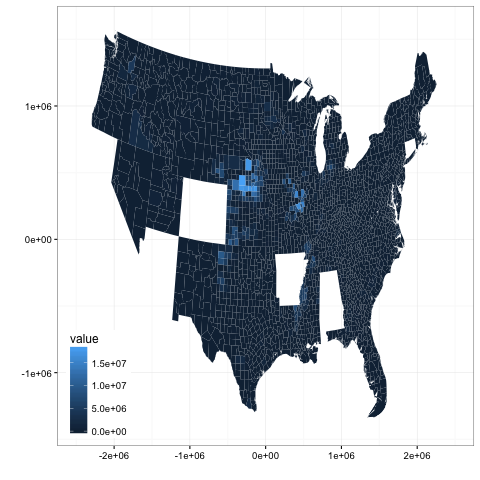

RCall.RObject{RCall.VecSxp}


In [7]:
mapdata(:Agriculture, :production, (:, 5, 1))

In [4]:
using RCall

In [5]:
R"x = rnorm(100)"

RCall.RObject{RCall.RealSxp}
  [1] -0.62122279  0.64831833 -0.48935885  0.92764611  1.02611765  1.59837396
  [7] -0.96725780 -0.49321665 -1.10164360 -1.33944063  1.31890750  0.25991008
 [13] -0.36737477  0.08100751  0.01820744  0.57968764 -0.83115791 -0.30559390
 [19]  0.82804637  0.87722282 -0.36368721  0.29606504 -0.01717716  0.18193819
 [25]  0.98784232 -0.04729326 -0.76462815 -0.23869830  0.87341128 -0.56540542
 [31]  0.24752053 -0.93169866 -0.01312905  1.17846349  0.26131608  1.81919341
 [37]  1.72917614  0.14759056  0.88830378 -1.09978466  0.01376463 -0.23974337
 [43]  0.20255462 -1.12002824 -0.17669488  0.34420994 -0.46455188  1.14323986
 [49]  0.18923975 -0.17559747 -0.38363851 -1.08267915  1.09002894  0.94087581
 [55] -0.43349359 -0.44734339  3.37063110  1.36829580 -0.44395899 -1.16338533
 [61] -0.97981821  0.20694984 -0.06456482  0.47541359  0.52327356  1.63704958
 [67]  0.32423036  0.49562667 -0.33220034  0.54913155 -0.37544318  0.26960028
 [73]  0.55244578  0.89318511 -0.02

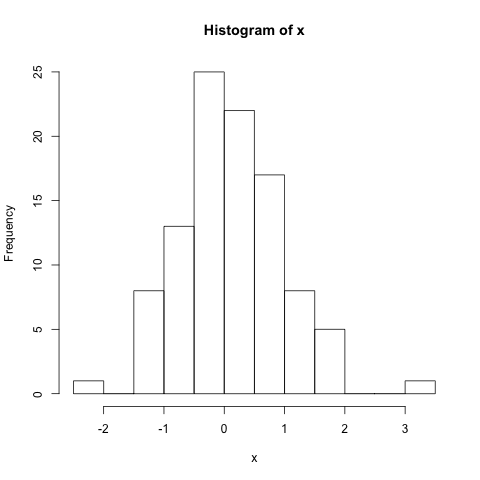

RCall.RObject{RCall.VecSxp}
$breaks
 [1] -2.5 -2.0 -1.5 -1.0 -0.5  0.0  0.5  1.0  1.5  2.0  2.5  3.0  3.5

$counts
 [1]  1  0  8 13 25 22 17  8  5  0  0  1

$density
 [1] 0.02 0.00 0.16 0.26 0.50 0.44 0.34 0.16 0.10 0.00 0.00 0.02

$mids
 [1] -2.25 -1.75 -1.25 -0.75 -0.25  0.25  0.75  1.25  1.75  2.25  2.75  3.25

$xname
[1] "x"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"


In [6]:
R"hist(x)"

In [7]:
myjuliavar = [1, 2, 3]

3-element Array{Int64,1}:
 1
 2
 3

In [8]:
myjuliavar

3-element Array{Int64,1}:
 1
 2
 3

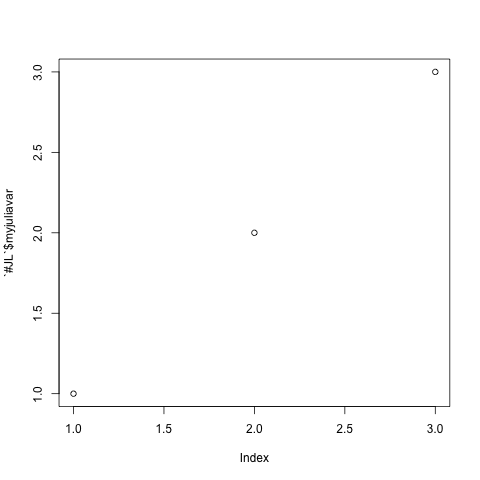

RCall.RObject{RCall.NilSxp}
NULL


In [9]:
R"plot($myjuliavar)"

In [10]:
x = R"rnorm(100)"

RCall.RObject{RCall.RealSxp}
  [1] -0.396211276 -1.102864069 -0.273230592 -0.498711128 -1.688747229
  [6] -0.625395697  0.788866194  0.503396481  0.806131966 -0.685962168
 [11]  1.409655399 -0.011001650  1.221350838  0.687594625  0.660120389
 [16]  0.323121302  1.121587552 -0.125611715  1.772632044 -1.576097599
 [21] -0.660744500 -0.429240447 -0.490280026  0.468150307  1.198544526
 [26] -0.583805903 -0.911470531 -0.929171990 -1.592459809  1.008367742
 [31]  1.042998949 -0.182158343 -0.198155519  0.064799689  1.055615930
 [36]  1.396022389  0.363787500 -0.265379634 -0.485115714  0.513091917
 [41] -0.340089246 -0.725946945  0.465066983  0.925172640 -0.499757044
 [46] -0.496244776 -0.946024643 -1.095053418 -1.131125050  1.549266436
 [51] -1.311331940  1.201508605 -0.271954598  2.534004825 -1.623282056
 [56]  0.001984485 -0.509082941  0.023470704 -0.710153768 -1.048219819
 [61]  0.950574020  0.223231617 -1.496654999 -0.660755363 -0.865973022
 [66] -1.125167386 -0.679917414 -1.014248154  1.

In [11]:
x

RCall.RObject{RCall.RealSxp}
  [1] -0.396211276 -1.102864069 -0.273230592 -0.498711128 -1.688747229
  [6] -0.625395697  0.788866194  0.503396481  0.806131966 -0.685962168
 [11]  1.409655399 -0.011001650  1.221350838  0.687594625  0.660120389
 [16]  0.323121302  1.121587552 -0.125611715  1.772632044 -1.576097599
 [21] -0.660744500 -0.429240447 -0.490280026  0.468150307  1.198544526
 [26] -0.583805903 -0.911470531 -0.929171990 -1.592459809  1.008367742
 [31]  1.042998949 -0.182158343 -0.198155519  0.064799689  1.055615930
 [36]  1.396022389  0.363787500 -0.265379634 -0.485115714  0.513091917
 [41] -0.340089246 -0.725946945  0.465066983  0.925172640 -0.499757044
 [46] -0.496244776 -0.946024643 -1.095053418 -1.131125050  1.549266436
 [51] -1.311331940  1.201508605 -0.271954598  2.534004825 -1.623282056
 [56]  0.001984485 -0.509082941  0.023470704 -0.710153768 -1.048219819
 [61]  0.950574020  0.223231617 -1.496654999 -0.660755363 -0.865973022
 [66] -1.125167386 -0.679917414 -1.014248154  1.

In [12]:
Pkg.add("YAML")

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of YAML
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [13]:
    countyinfo = readtable("../data/county-info.csv")

,FIPS,County,ST,Neighboring,UrbanPop_2010,RuralPop_2010,MedianHouseholdInc_2008_12,Elevation_ft,TotalArea_sqmi,LandArea_sqmi,WaterArea_sqmi
1,1001,Autauga,AL,-1677436972259693513,31650,22921,53773,290.0,604.39,594.44,9.95
2,1003,Baldwin,AL,-7503806633868418079,105205,77060,50706,155.0,2027.31,1589.78,437.53
3,1005,Barbour,AL,-9162367971339582421,8844,18613,31889,220.0,904.52,884.88,19.64
4,1007,Bibb,AL,-3263215093836123959,7252,15663,36824,224.0,626.17,622.58,3.59
5,1009,Blount,AL,281814405218882823,5760,51562,45192,870.0,650.63,644.78,5.85
6,1011,Bullock,AL,-7528364842213094795,5307,5607,34500,455.0,625.14,622.8,2.34
7,1013,Butler,AL,7263807205192509739,6026,14921,30752,445.0,777.88,776.83,1.05
8,1015,Calhoun,AL,4089652745186409211,78617,39955,40093,565.0,612.29,605.87,6.42
9,1017,Chambers,AL,1546726499117356153,17399,16816,32181,745.0,603.11,596.53,6.58
10,1019,Cherokee,AL,3606844344126915727,3707,22282,36241,589.0,599.98,553.7,46.28


In [14]:
areas = countyinfo[:, :LandArea_sqmi]

3229-element DataArrays.DataArray{Float64,1}:
  594.44
 1589.78
  884.88
  622.58
  644.78
  622.8 
  776.83
  605.87
  596.53
  553.7 
  692.85
  913.5 
 1238.46
    ⋮   
   23.24
   20.76
  113.53
   27.73
   45.86
   50.77
   35.64
   55.21
   68.19
   83.32
   19.69
   31.31

In [18]:
# The Brewery Component
# This is how we make beer

using Mimi

@defcomp Brewery begin
    region = Index()

    production = Parameter(index=[region, time], unit="liter")

    hopsdemand = Variable(index=[region, time], unit="MT")
    waterdemand = Variable(index=[region, time], unit="1000 m^3")
end

function run_timestep(c::Brewery, tt::Int64)
    v, p, d = getvpd(c)

    v.hopsdemand[:, tt] = .07 * p.production[:, tt]
    v.waterdemand[:, tt] = 2 * p.production[:, tt] / 1e6
end

function initbrewery(m::Model)
    brewery = addcomponent(m, Brewery)

    production = readtable("../data/county-info.csv")[:, :LandArea_sqmi]

    brewery[:production] = repeat(production, outer=[1, numsteps])
end


initbrewery (generic function with 1 method)

In [29]:
m = Model()
setindex(m, :time, [1]) # Single period
setindex(m, :region, length(dropna(readtable("../data/county-info.csv")[:LandArea_sqmi])))


In [31]:
initbrewery(m)


LoadError: LoadError: MethodError: `convert` has no method matching convert(::Type{DataArrays.DataArray{Float64,1}}, ::Array{Float64,2}, ::BitArray{2})
This may have arisen from a call to the constructor DataArrays.DataArray{Float64,1}(...),
since type constructors fall back to convert methods.
Closest candidates are:
  call{T}(::Type{T}, ::Any)
  convert{S,T,N}(::Type{DataArrays.DataArray{S,N}}, !Matched::DataArrays.DataArray{T,N})
  convert{S,T,R<:Integer,N}(::Type{DataArrays.DataArray{S,N}}, !Matched::DataArrays.PooledDataArray{T,R<:Integer,N})
  ...
while loading In[31], in expression starting on line 1

In [32]:
    brewery = addcomponent(m, Brewery)

    production = readtable("../data/county-info.csv")[:, :LandArea_sqmi]


3229-element DataArrays.DataArray{Float64,1}:
  594.44
 1589.78
  884.88
  622.58
  644.78
  622.8 
  776.83
  605.87
  596.53
  553.7 
  692.85
  913.5 
 1238.46
    ⋮   
   23.24
   20.76
  113.53
   27.73
   45.86
   50.77
   35.64
   55.21
   68.19
   83.32
   19.69
   31.31

In [33]:
    brewery[:production] = repeat(convert(Vector{Float64}, dropna(production)), outer=[1, numsteps])


3225x1 Array{Float64,2}:
  594.44
 1589.78
  884.88
  622.58
  644.78
  622.8 
  776.83
  605.87
  596.53
  553.7 
  692.85
  913.5 
 1238.46
    ⋮   
   23.24
   20.76
  113.53
   27.73
   45.86
   50.77
   35.64
   55.21
   68.19
   83.32
   19.69
   31.31

In [30]:
function initbrewer(m::Model)
    brewery = addcomponent(m, Brewery)

    production = readtable("../data/county-info.csv")[:, :LandArea_sqmi]

    brewery[:production] = repeat(convert(Vector{Float64}, dropna(production)), outer=[1, numsteps])
end


initbrewer (generic function with 1 method)

In [34]:
run(m)

In [35]:
m[:Brewery, :hopsdemand]

3225x1 Array{Float64,2}:
  41.6108
 111.285 
  61.9416
  43.5806
  45.1346
  43.596 
  54.3781
  42.4109
  41.7571
  38.759 
  48.4995
  63.945 
  86.6922
   ⋮     
   1.6268
   1.4532
   7.9471
   1.9411
   3.2102
   3.5539
   2.4948
   3.8647
   4.7733
   5.8324
   1.3783
   2.1917

In [36]:
m[:Brewery, :waterdemand]

3225x1 Array{Float64,2}:
 0.00118888
 0.00317956
 0.00176976
 0.00124516
 0.00128956
 0.0012456 
 0.00155366
 0.00121174
 0.00119306
 0.0011074 
 0.0013857 
 0.001827  
 0.00247692
 ⋮         
 4.648e-5  
 4.152e-5  
 0.00022706
 5.546e-5  
 9.172e-5  
 0.00010154
 7.128e-5  
 0.00011042
 0.00013638
 0.00016664
 3.938e-5  
 6.262e-5  